<a href="https://colab.research.google.com/github/Aayushkumar7/Capstone_project/blob/main/Sentiment_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets

## Problem Description

## This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.
The names and usernames have been given codes to avoid any privacy concerns.
You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label 

# INTRODUCTION

Sentiment Analysis is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic is positive, negative, or neutral.

COVID-19 originally known as Coronavirus Disease of 2019, has been declared as a pandemic by World Health Organization (WHO) on 11th March 2020.

The study analyzes various types of tweets gathered during the pandemic times hence can be useful in policy making to safeguard the countries by demystifying the pertinent facts and information.

In [ ]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing dataset
df=pd.read_csv('/content/drive/MyDrive/Dataset/Coronavirus_Tweets.csv', encoding = "ISO-8859-1", engine='python')

# Exploratory Data Analysis (Summary)

1. Original Dataset contains 6 columns and 41157 rows.
2. Location column contains approx 21% of Null values. so, we have      dropped the NaN values.
3. After dropping we have left with 32567 rows and 6 columns.
4. In order to analyse the data we required only two columns "OriginalTweet" & "Sentiment".
5.  The columns such as “UserName” and “ScreenName” does not give any meaningful insights for our analysis.
6. There are five types of sentiments- Extremely Negative, Negative, Neutral, Positive and Extremely Positive.
7. All tweets data collected from the months of March and April 2020. Bar plot shows us the number of unique values in each column.
8. Most of the tweets came from London followed by U.S. 

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# There are Null values in location column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
# Dataset summary of object datatype
df.describe(include='O')

,Location,TweetAt,OriginalTweet,Sentiment
count,32567,41157,41157,41157
unique,12220,30,41157,5
top,London,20-03-2020,Ran out of office the moment it clocked 5:00pm...,Positive
freq,540,3448,1,11422


In [ ]:
# Checking the % of Null values and duplicate values if any
print(df.isnull().sum()/len(df)*100)
print(df.duplicated().sum() , "Duplicate Values")

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64
0 Duplicate Values


In [ ]:
# Drooping Null values from the dataset
df.dropna(inplace=True)

In [ ]:
# Dataset shape after dropping null rows
df.shape

(32567, 6)

In [ ]:
df.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [ ]:
# All the tweet came from March and April 2020
df['TweetAt'].value_counts()

20-03-2020    2618
19-03-2020    2614
25-03-2020    2384
18-03-2020    2183
21-03-2020    2066
22-03-2020    1618
23-03-2020    1604
17-03-2020    1555
08-04-2020    1527
07-04-2020    1487
06-04-2020    1372
09-04-2020    1185
24-03-2020    1167
13-04-2020    1148
26-03-2020    1025
05-04-2020     880
10-04-2020     815
02-04-2020     779
11-04-2020     722
03-04-2020     656
04-04-2020     615
12-04-2020     593
16-03-2020     529
01-04-2020     503
27-03-2020     280
31-03-2020     253
14-04-2020     210
29-03-2020      95
30-03-2020      65
28-03-2020      19
Name: TweetAt, dtype: int64

In [ ]:
#There are 12220 unique locations from where tweet came
df['Location'].value_counts()

London                                                      540
United States                                               528
London, England                                             520
New York, NY                                                395
Washington, DC                                              373
                                                           ... 
Bolton                                                        1
An immune system, far far away                                1
Forbidden 3rd floor corridor                                  1
Happiness is not an ideal of reason, but of imagination.      1
liverpool england                                             1
Name: Location, Length: 12220, dtype: int64

In [ ]:
# There are 5 unique Sentiment
df['Sentiment'].value_counts()

Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: Sentiment, dtype: int64

# Exploring more on Tweet and Sentiment

In [ ]:
df[df['Sentiment']=='Extremely Negative']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
20,3819,48771,southampton soxx xxx,16-03-2020,with 100 nations inficted with covid 19 th...,Extremely Negative
27,3826,48778,Everywhere You Are!,16-03-2020,This morning I tested positive for Covid 19. I...,Extremely Negative
29,3828,48780,"Someplace, USA",16-03-2020,@7SealsOfTheEnd Soon with dwindling supplies u...,Extremely Negative
42,3841,48793,Houston,16-03-2020,CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No fo...,Extremely Negative
50,3849,48801,"Washington, DC",16-03-2020,"""Everything weÂre seeing in the current COVID...",Extremely Negative
...,...,...,...,...,...,...
41078,44877,89829,London,14-04-2020,"Sneezed at a grocery store today. The power, t...",Extremely Negative
41098,44897,89849,"Wall Street, SF, Tokyo",14-04-2020,"WSJ: Farmers Dump Milk, Break Eggs as #Coronav...",Extremely Negative
41110,44909,89861,Los Angeles,14-04-2020,Bruh??? It's so truuuuuue! I choked on my own ...,Extremely Negative
41128,44927,89879,"Melbourne, Australia",14-04-2020,The COVID-19 pandemic and global oil price war...,Extremely Negative


In [ ]:
df[df['Sentiment']=='Extremely Negative'].loc[50,'OriginalTweet']

'"Everything weÂ\x92re seeing in the current COVID-19 outbreak has been seen before in previous epidemics and pandemics; the rise of fear, racism, panic buying of food and medicines, conspiracy theories, the proliferation of quack cures" https://t.co/Pr8NpKX41A'

In [ ]:
df[df['Sentiment']=='Negative']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative
24,3823,48775,Downstage centre,16-03-2020,@10DowningStreet @grantshapps what is being do...,Negative
26,3825,48777,"Ketchum, Idaho",16-03-2020,In preparation for higher demand and a potenti...,Negative
28,3827,48779,"New York, NY",16-03-2020,Do you see malicious price increases in NYC? T...,Negative
34,3833,48785,"London, England",16-03-2020,We're sorry to say that our @FinFabUK event is...,Negative
...,...,...,...,...,...,...
41124,44923,89875,"San Diego, CA",14-04-2020,With @Topps &amp; @PaniniAmerica shutting down...,Negative
41131,44930,89882,"Accra, Ghana",14-04-2020,In every human affliction there are gainers a...,Negative
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative
41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative


In [ ]:
df[df['Sentiment']=='Negative'].loc[34,'OriginalTweet']

"We're sorry to say that our @FinFabUK event is being cancelled due to Covid-19. The health and wellbeing of our attendees, speakers and staff is our top priority. Apologies for any disappointment this may cause. All FAQs are answered in the link below:\r\r\nhttps://t.co/GDDPTudCvj"

In [ ]:
df[df['Sentiment']=='Neutral']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
10,3809,48761,"Makati, Manila",16-03-2020,All month there hasn't been crowding in the su...,Neutral
16,3815,48767,Saudi Arabia,16-03-2020,????? ????? ????? ????? ??\r\r\n?????? ????? ?...,Neutral
17,3816,48768,"Ontario, Canada",16-03-2020,@eyeonthearctic 16MAR20 Russia consumer survei...,Neutral
...,...,...,...,...,...,...
41134,44933,89885,"Greenville, NC",14-04-2020,The coronavirus has been a breeding ground for...,Neutral
41136,44935,89887,"Pasadena, CA",14-04-2020,How COVID-19 Has Impacted How Consumers Spend ...,Neutral
41141,44940,89892,India,14-04-2020,#Coronavirus ?? ????? ??? ????? ?? ??? ???????...,Neutral
41143,44942,89894,In burning hell.,14-04-2020,https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUn...,Neutral


In [ ]:
df[df['Sentiment']=='Neutral'].loc[17,'OriginalTweet']

'@eyeonthearctic 16MAR20 Russia consumer surveillance watchdog reported case in high Arctic where a man who traveled to Iran has COVID-19 and 101 are "observed"\r\r\nhttps://t.co/4WnrrK9oKC https://t.co/ld05k5Eyns'

In [ ]:
df[df['Sentiment']=='Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
...,...,...,...,...,...,...
41135,44934,89886,"New York, NY",14-04-2020,"As physical stores close, clothing retailers a...",Positive
41140,44939,89891,Pakistan,14-04-2020,Good News! \r\r\nWe'll Soon Announce Our High ...,Positive
41145,44944,89896,"Manhattan, NY",14-04-2020,How exactly are we going to re-open New York C...,Positive
41146,44945,89897,"Gurgaon, India",14-04-2020,#Gold prices rose to a more than 7-year high t...,Positive


In [ ]:
df[df['Sentiment']=='Positive'].loc[8,'OriginalTweet']

'Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business or classes for the next two weeks, beginning Monday, March 16.  We will continue to process online and phone orders as normal! Thank you for your understanding! https://t.co/kw91zJ5O5i'

In [ ]:
df[df['Sentiment']=='Extremely Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
11,3810,48762,"Pitt Meadows, BC, Canada",16-03-2020,"Due to the Covid-19 situation, we have increas...",Extremely Positive
12,3811,48763,Horningsea,16-03-2020,#horningsea is a caring community. LetÂs ALL ...,Extremely Positive
18,3817,48769,North America,16-03-2020,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",Extremely Positive
25,3824,48776,London,16-03-2020,UK #consumer poll indicates the majority expec...,Extremely Positive
33,3832,48784,"Virginia, USA",16-03-2020,Coronavirus fun fact: if you cough at the groc...,Extremely Positive
...,...,...,...,...,...,...
41104,44903,89855,"Philadelphia, PA",14-04-2020,@ldsanty @GovMurphy @EdMorrissey What would yo...,Extremely Positive
41114,44913,89865,"San Francisco, CA",14-04-2020,Can sneakerheads turn a profit during Covid 19...,Extremely Positive
41137,44936,89888,"LES, NYC",14-04-2020,Distilleries have switched portions of their p...,Extremely Positive
41138,44937,89889,"Los Angeles, CA",14-04-2020,HMU FOR PRICES!! Got great deals going right n...,Extremely Positive


In [ ]:
df[df['Sentiment']=='Extremely Positive'].loc[33,'OriginalTweet']

'Coronavirus fun fact: if you cough at the grocery store, you get the whole aisle to yourself pretty quickly.\r\r\n#CoronavirusOutbreak #coronavirus #COVID2019'

# Unique Values in each Feature Column

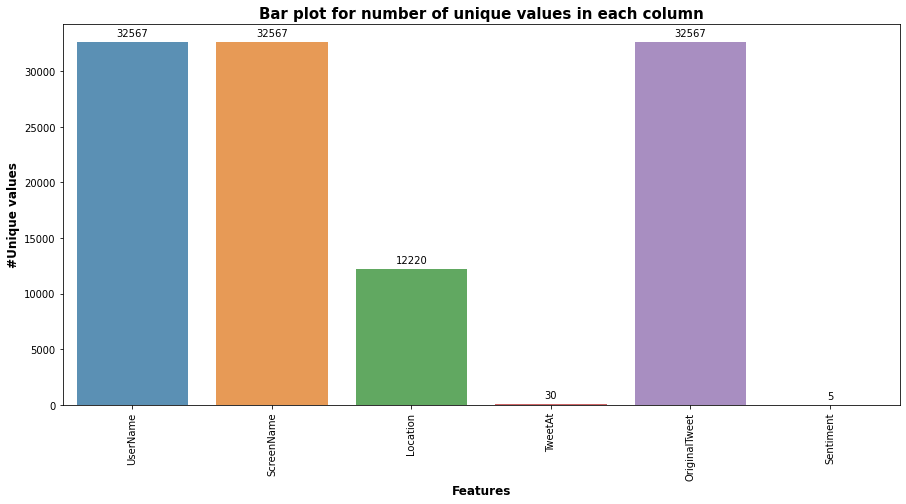

In [ ]:
unique_df=pd.DataFrame()
unique_df['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
unique_df['Uniques']=unique



f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

# Count Plot Sentiment column.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


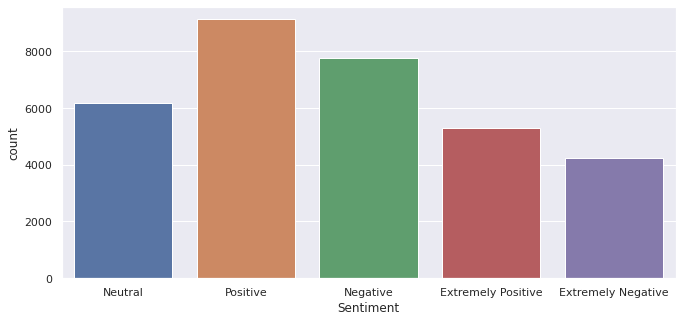

In [ ]:
sns.set(rc={'figure.figsize':(11,5)})
sns.countplot(df['Sentiment'])

Most of the Sentiment is positive. 

# CountPlot for Sentiment according to "TweetAt" column.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

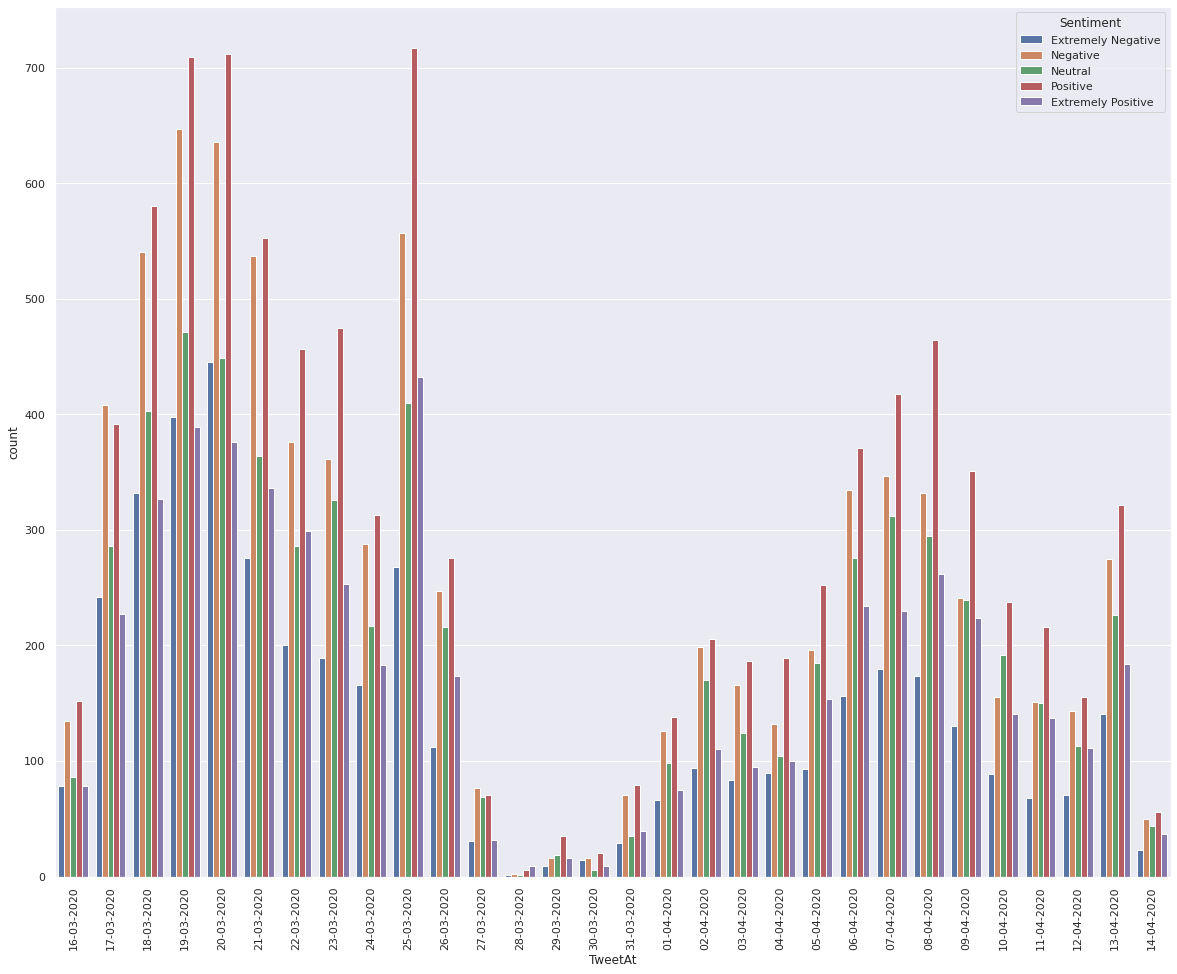

In [ ]:
sns.set(rc={'figure.figsize':(20,16)})
sns.countplot(df.TweetAt,hue=df.Sentiment,hue_order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'])
plt.xticks(rotation = 90)

# CountPlot for OriginalTweet according to "TweetAt" column.

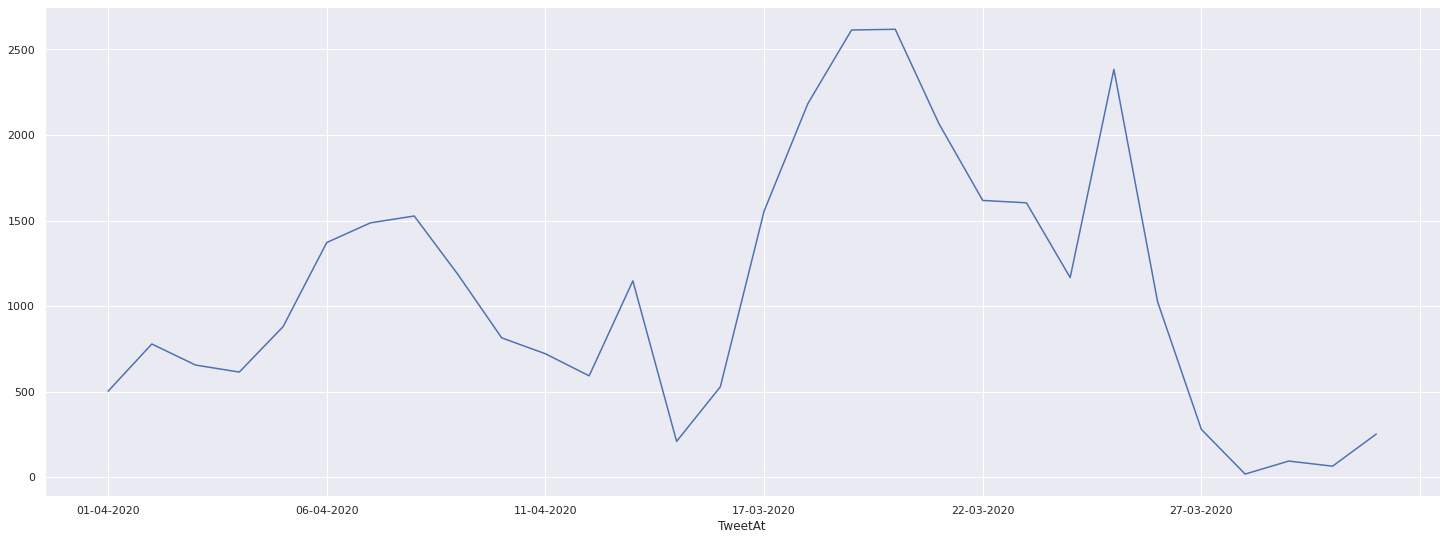

In [ ]:
plt.figure(figsize=(25,9))
grp_tweetAt=df.groupby('TweetAt').count()['OriginalTweet'].plot()
plt.show()

# Histogram plot of the length of OriginalTweet.

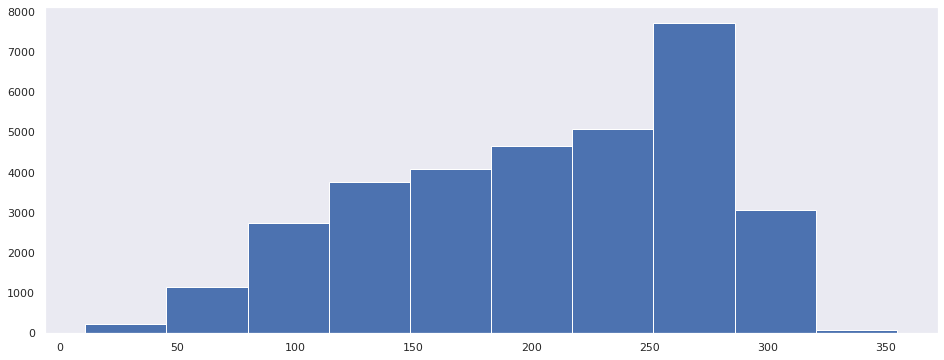

In [ ]:
plt.figure(figsize=(16,6))
plt.grid()

plt.hist(df['OriginalTweet'].str.len())
plt.show()

# Top 10 Location

In [ ]:
location_top10 = df['Location'].value_counts().sort_values(ascending=False)[:10]
location_top10

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

# Count Plot of Top 10 Location

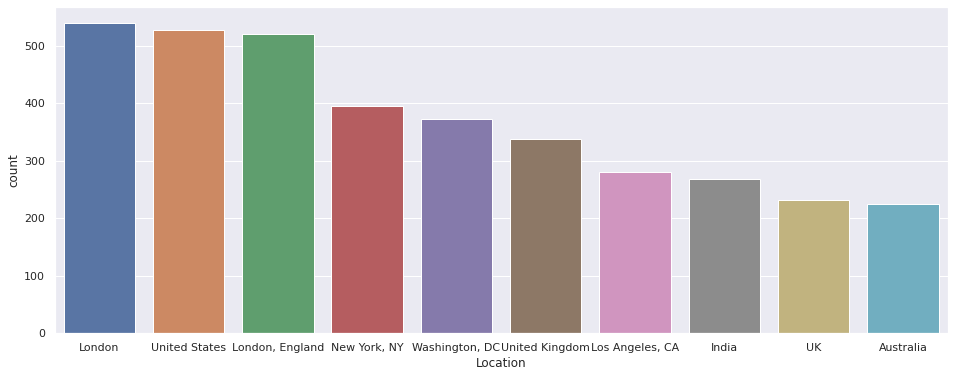

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data=df[df['Location'].isin(location_top10.index)], x='Location',order=location_top10.index)